In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv("/content/archive (4).zip")
print (dataset.head)

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: >

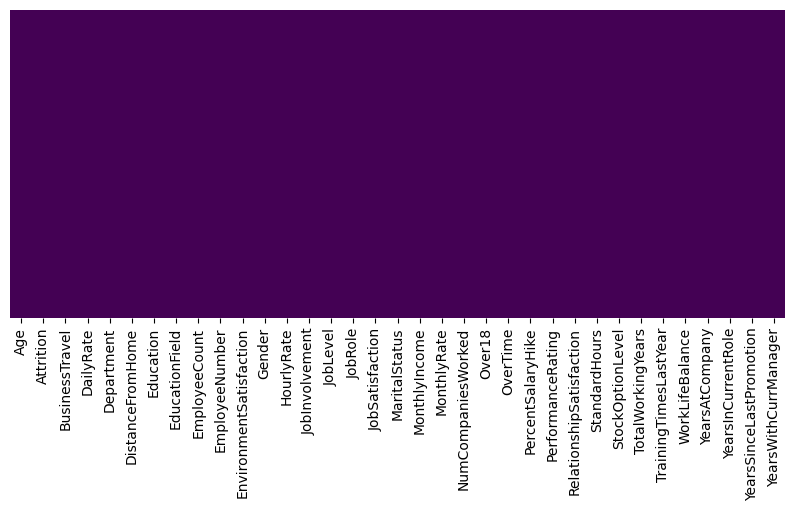

In [5]:
# heatmap to check the missing value
plt.figure(figsize =(10, 4))
sns.heatmap(dataset.isnull(),
            yticklabels = False,
                        cbar = False,
                                    cmap ='viridis')

<Axes: xlabel='Attrition', ylabel='count'>

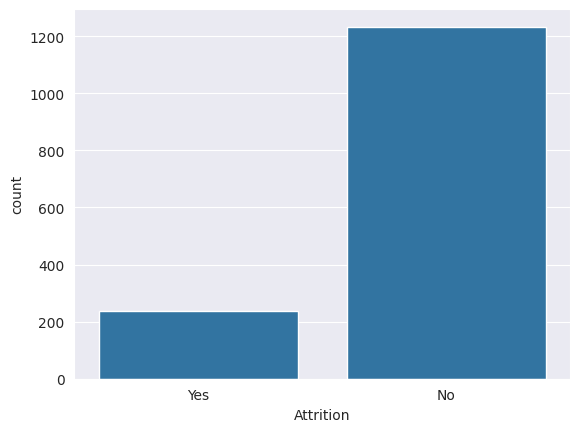

In [6]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition',
              data = dataset)

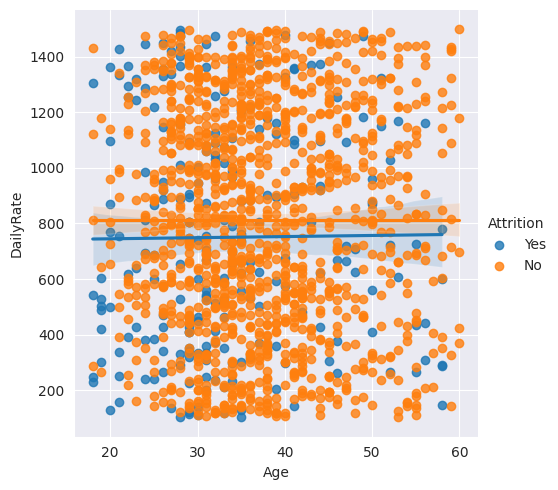

In [7]:
sns.lmplot(x = 'Age',
           y = 'DailyRate',
                      hue = 'Attrition',
                                 data = dataset)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

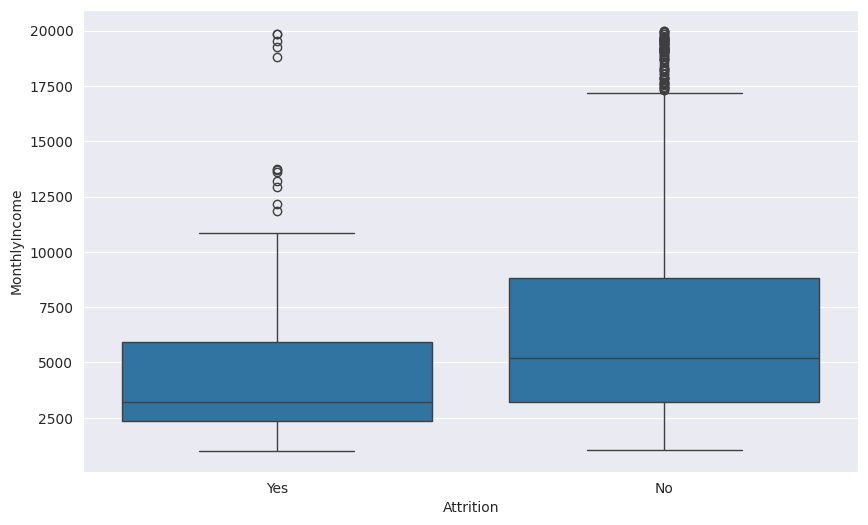

In [8]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome',
            x ='Attrition',
                        data = dataset)

In [10]:
dataset.drop('EmployeeCount',
             axis = 1,
             inplace = True)
dataset.drop('StandardHours',
            axis = 1,
            inplace = True)
dataset.drop('EmployeeNumber',
             axis = 1,
             inplace = True)
dataset.drop('Over18',
             axis = 1,
             inplace = True)
print(dataset.shape)

(1470, 31)


In [11]:
y = dataset.iloc[:, 1]
X = dataset
X.drop('Attrition',
       axis = 1,
       inplace = True)

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [19]:
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'],
                                    prefix ='BusinessTravel')
dum_Department = pd.get_dummies(dataset['Department'],
                               prefix ='Department')
dum_EducationField = pd.get_dummies(dataset['EducationField'],
                                    prefix ='EducationField')

dum_Gender = pd.get_dummies(dataset['Gender'],
                            prefix ='Gender', drop_first = True)
dum_JobRole = pd.get_dummies(dataset['JobRole'],
                             prefix ='JobRole')
dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'],
                                  prefix ='MaritalStatus')
dum_OverTime = pd.get_dummies(dataset['OverTime'],
                             prefix ='OverTime', drop_first = True)
x = dataset.drop(['BusinessTravel', 'Department', 'EducationField',
        'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
               axis = 1)
X = pd.concat([x, dum_BusinessTravel, dum_Department,
               dum_EducationField, dum_Gender, dum_JobRole,
               dum_MaritalStatus, dum_OverTime], axis = 1)

print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

In [27]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,
                            criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

def print_score(clf, X_train, y_train,
                X_test, y_test,
                train=True):
   if train:
    print("Train Result:")
    print("------------")
    print("Classification Report: \n {}\n".format(classification_report(
        y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(
                  y_train, clf.predict(X_train))))
    res = cross_val_score(clf, X_train, y_train,
                          cv=10, scoring='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    print("----------------------------------------------------------")
   elif train == False:
    print("Test Result:")
    print("-----------")
    print("Classification Report: \n {}\n".format(
        classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(
        confusion_matrix(y_test, clf.predict(X_test))))
    print("accuracy score: {0:.4f}\n".format(
        accuracy_score(y_test, clf.predict(X_test))))
    print("-----------------------------------------------------------")
print_score(rf, X_train, y_train,
            X_test, y_test,
            train=True)
print_score(rf, X_train, y_train,
            X_test, y_test,
            train=False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       922
           1       1.00      0.89      0.94       180

    accuracy                           0.98      1102
   macro avg       0.99      0.94      0.97      1102
weighted avg       0.98      0.98      0.98      1102


Confusion Matrix: 
 [[922   0]
 [ 20 160]]

Average Accuracy: 	 0.8421
Accuracy SD: 		 0.0182
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       311
           1       0.76      0.23      0.35        57

    accuracy                           0.87       368
   macro avg       0.82      0.61      0.64       368
weighted avg       0.86      0.87      0.84       368


Confusion Matrix: 
 [[307   4]
 [ 44  13]]

accuracy score: 0.8696

---------------------

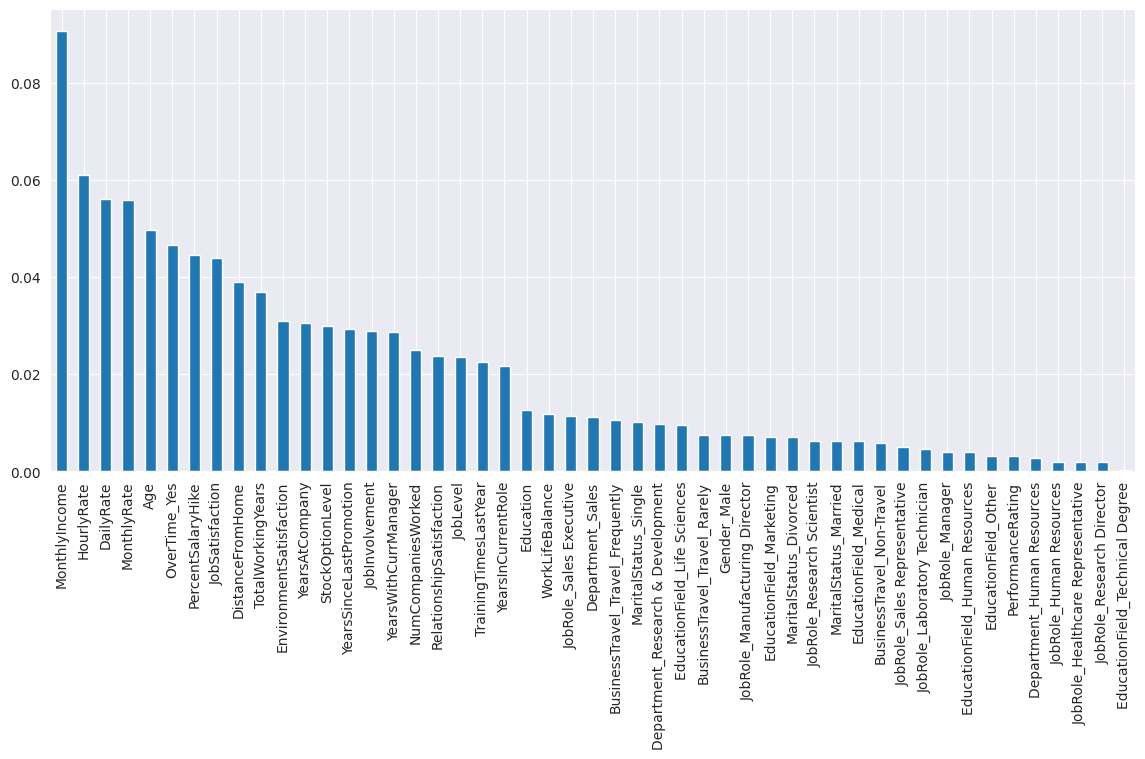

In [28]:
pd.Series(rf.feature_importances_,
          index = X.columns).sort_values(ascending = False).plot(kind = 'bar',
                                                                figsize = (14,6));